In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data_all = "Output/2019_2020_mixed_beverage"
file_path2 = "Output/Dallas_metro_unemployment.csv"


df_all = pd.read_csv(data_all, encoding="utf-8")
df2 = pd.read_csv(file_path2, encoding="utf-8")


In [3]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,responsibility_begin_date_yyyymmdd,obligation_end_date_yyyymmdd,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,responsibility_end_date_yyyymmdd,year,month
3,32054228120,S & KW CORPORATION,6617 CHIMNEY ROCK RD,HOUSTON,TX,77081.0,101,1,NAZARETH CAFE,6617 CHIMNEY ROCK RD,...,2014-08-01T00:00:00.000,2019-01-31T00:00:00.000,3212,0,2509,0,5721,NaN,2019,1
4,32000861685,"FOUNTAIN FOODS, INC.",25600 WESTHEIMER PKWY STE 110,KATY,TX,77494.0,79,2,HARVEST ORGANIC GRILLE,1810 FOUNTAIN VIEW DR,...,2012-08-21T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-06-01T00:00:00.000,2019,1
5,17526234541,"THE KING LOUNGE, INC.",3684 ASBURY ST,DALLAS,TX,75205.0,57,1,THE KING LOUNGE INC,1602 MARKET CENTER BLVD,...,1996-02-15T00:00:00.000,2019-01-31T00:00:00.000,0,0,0,0,0,2019-01-16T00:00:00.000,2019,1
10,32061761998,WICKED WINGS LLC,615 W SLAUGHTER LN STE 108,AUSTIN,TX,78748.0,227,2,BUCKET'S BACKYARD BAR AND GRILL,9900 S INTERSTATE 35 BLDG M STE 200,...,2017-03-17T00:00:00.000,2019-01-31T00:00:00.000,8777,215,15076,0,24068,2019-09-09T00:00:00.000,2019,1
12,32059688088,"RICHMOND MIA BELLA, LLC",19 MAYMONT WAY,SPRING,TX,77382.0,170,1,MIA BELLA TRATTORIA,3773 RICHMOND AVE STE 1A,...,2017-05-09T00:00:00.000,2019-01-31T00:00:00.000,12965,25073,2298,0,40336,2019-06-13T00:00:00.000,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119989,32055936457,"CAFI TOULOUSE RIVER OAKS DISTRICT, LP",3100 MONTICELLO AVE STE 325,DALLAS,TX,75205.0,57,1,CAFE TOULOUSE,4444 WESTHEIMER RD STE E100,...,2015-05-29T00:00:00.000,2020-12-31T00:00:00.000,178933,206491,8562,0,393986,NaN,2020,12
119990,17215567953,"FUN AND SPIRITS, INC.",223 W RHAPSODY DR,SAN ANTONIO,TX,78216.0,15,1,CROSS-EYED SEAGULL,19141 STONE OAK PKWY # 206,...,2004-12-27T00:00:00.000,2020-12-31T00:00:00.000,35832,20,13969,0,49821,NaN,2020,12
119994,32070563070,KAPRI ULTRA LOUNGE LLC,6239 WARWICK GARDEN LN,SPRING,TX,77379.0,101,1,KAPRI ULTRA LOUNGE,5718 FAIRDALE LN,...,2019-08-21T00:00:00.000,2020-12-31T00:00:00.000,37373,232,369,0,37974,NaN,2020,12
119996,17430007959,"SJ2 RESTAURANT GROUP, LLC",PO BOX 100510,SAN ANTONIO,TX,78201.0,15,7,JARDIN,555 FUNSTON PL,...,2020-09-15T00:00:00.000,2020-12-31T00:00:00.000,20277,29423,1680,0,51380,NaN,2020,12


In [4]:
mask = dfcities.location_city == "DALLAS"
dfdallas = dfcities.loc[mask]
dallas_sales = dfdallas.groupby(['year','month'])['total_receipts'].sum().reset_index()
dallas_sales2=pd.merge(dallas_sales,df2,on=['year','month'],how='left')
dallas_sales2.corr()

,year,month,total_receipts,Unemployment Rate
year,1.000000e+00,7.884865e-14,-0.816382,0.672858
month,7.884865e-14,1.000000e+00,-0.108216,0.055690
total_receipts,-8.163819e-01,-1.082156e-01,1.000000,-0.874869
Unemployment Rate,6.728577e-01,5.569007e-02,-0.874869,1.000000


<ipython-input-5-3db3b51e1767>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rotation=45,labels=dallas_sales2.Date)


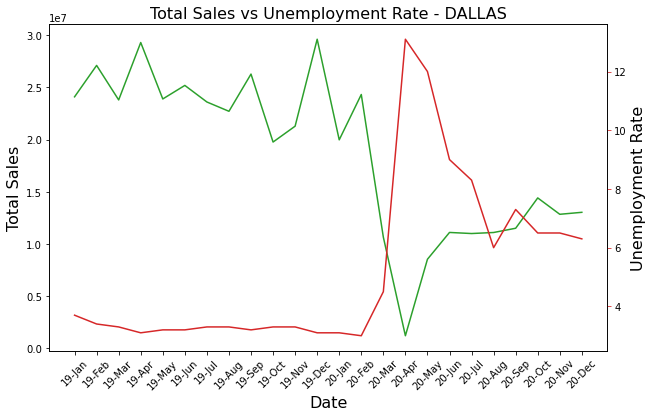

In [5]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Total Sales vs Unemployment Rate - DALLAS', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Total Sales', fontsize=16)
ax1 = sn.lineplot(x= 'Date', y='total_receipts', data = dallas_sales2, sort=False, color=color)
ax1.tick_params(axis='y')
# specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Unemployment Rate', fontsize=16)
ax2 = sn.lineplot(x='Date', y='Unemployment Rate', data=dallas_sales2, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#rotate tick labels
ax1.set_xticklabels(rotation=45,labels=dallas_sales2.Date)
#show plot
plt.show()


In [6]:
#2020 Location Count vs Pop STATSMODELS
feature = dallas_sales2[['Unemployment Rate']]
target = dallas_sales2[['total_receipts']]

X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_receipts   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     71.77
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           2.25e-08
Time:                        18:10:30   Log-Likelihood:                -396.57
No. Observations:                  24   AIC:                             797.1
Df Residuals:                      22   BIC:                             799.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.053e+07   1.61e+06     18.992      0.000    2.72e+07    3.39e+07
Unemployment Rate -2.292e+06   2.71e+05     -8.472      0.000   -2.85e+06   -1.73e+06
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                0.761
Skew:                          -0.404   Prob(JB):                        0.683
Kurtosis:                       3.329   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

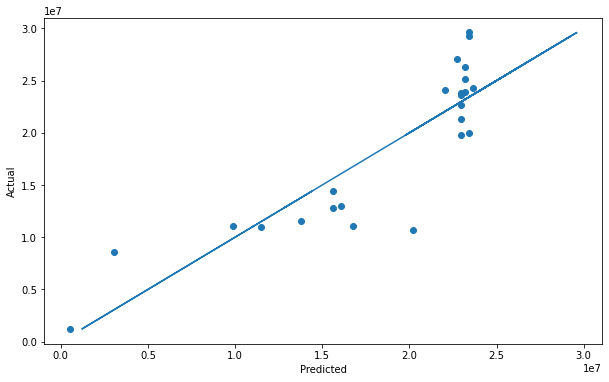

In [7]:
# predicted vs actual, Dallas Total Sales based on Unemployment

plt.figure(figsize=(10,6))

plt.scatter(results.fittedvalues, dallas_sales2['total_receipts'])

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.plot(dallas_sales2['total_receipts'], dallas_sales2['total_receipts'])

plt.show()

The r-squared is: 0.7653956443783404


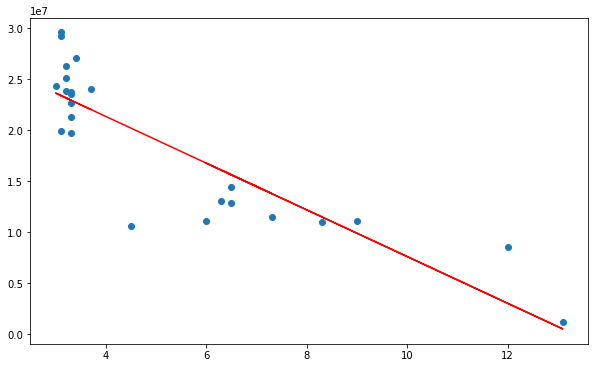

In [8]:
# make plot
plt.figure(figsize=(10,6))
plt.scatter(feature, target)

plt.plot(feature, results.fittedvalues, "r-")

# plt.annotate("y = -2.292e+06x - 3.053e+07",(200000, 20000000), fontsize=15,color="red")

# plt.xlabel('Runs Scored')
# plt.ylabel('Wins')
print(f"The r-squared is: {results.rsquared}")
plt.show()

In [9]:
#2019-2020 sales per capita 
city_sales = dfcities.groupby('location_city')['total_receipts'].sum().reset_index()
city_sales
city_pop = [978908,1343573, 874401,2320268,1547253]
city_sales['population']=city_pop
city_sales['sales_per_capita'] = city_sales.total_receipts/city_sales.population
city_sales['Sales Ranking'] = city_sales.total_receipts.rank(ascending=False)
city_sales['Sales per Capita Ranking'] = city_sales.sales_per_capita.rank(ascending=False)
city_sales

,location_city,total_receipts,population,sales_per_capita,Sales Ranking,Sales per Capita Ranking
0,AUSTIN,410293324,978908,419.133692,3.0,1.0
1,DALLAS,446286693,1343573,332.164083,2.0,2.0
2,FORT WORTH,150646054,874401,172.284860,5.0,5.0
3,HOUSTON,586858982,2320268,252.927240,1.0,3.0
4,SAN ANTONIO,309296894,1547253,199.900659,4.0,4.0


In [10]:
#2019 sales per capita 
mask_2019 = dfcities.year == 2019
dfcities2019 = dfcities.loc[mask_2019]
citysales2019 = dfcities2019.groupby('location_city')['total_receipts'].sum().reset_index()
city_pop = [978908,1343573, 874401,2320268,1547253]
citysales2019['population']=city_pop
citysales2019['sales_per_capita'] = citysales2019.total_receipts/citysales2019.population
citysales2019['Sales Ranking'] = citysales2019.total_receipts.rank(ascending=False)
citysales2019['Sales per Capita Ranking'] = citysales2019.sales_per_capita.rank(ascending=False)
citysales2019_sort = citysales2019.sort_values("total_receipts",ascending=True)
citysales2019_sort


,location_city,total_receipts,population,sales_per_capita,Sales Ranking,Sales per Capita Ranking
2,FORT WORTH,91968396,874401,105.178741,5.0,5.0
4,SAN ANTONIO,200066163,1547253,129.304104,4.0,4.0
0,AUSTIN,289090039,978908,295.318905,3.0,1.0
1,DALLAS,296571594,1343573,220.733517,2.0,2.0
3,HOUSTON,384811690,2320268,165.847949,1.0,3.0


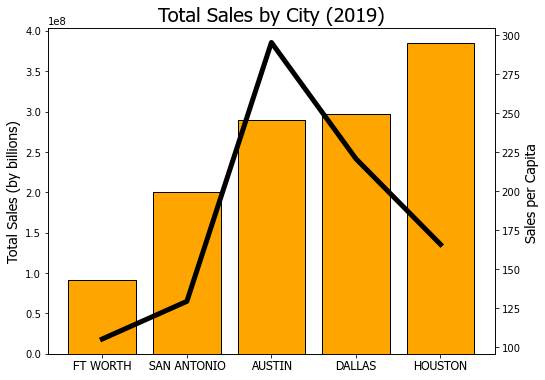

In [11]:
plt.figure(figsize=(8,6))
cities = []
for city in citysales2019_sort['location_city']:
    cities.append(citysales2019_sort['location_city'])
total_sales = citysales2019_sort['total_receipts']
x_axis = np.arange(len(cities))
plt.bar(x_axis, total_sales, color="orange", edgecolor="black", align="center")
hfont = {'fontname':'Tahoma'}
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['FT WORTH','SAN ANTONIO','AUSTIN','DALLAS','HOUSTON'], **hfont,fontsize=12)
plt.ylabel("Total Sales (by billions)", **hfont,fontsize=14)
axis2 = plt.twinx()
axis2.plot(x_axis, citysales2019_sort['sales_per_capita'], color='black',linewidth=5)
# axes2.set_ylim(-1, 1)
axis2.set_ylabel('Sales per Capita ', **hfont,fontsize=14)
plt.title("Total Sales by City (2019)", **hfont,fontsize=20)
plt.savefig("../SMU_Project1_Group1/total_sales_by_city_2019.png")
plt.show()

In [12]:
#2020 sales per capita 
mask_2020 = dfcities.year == 2020
dfcities2020 = dfcities.loc[mask_2020]
citysales2020 = dfcities2020.groupby('location_city')['total_receipts'].sum().reset_index()
city_pop = [978908,1343573, 874401,2320268,1547253]
citysales2020['population']=city_pop
citysales2020['sales_per_capita'] = citysales2020.total_receipts/citysales2020.population
citysales2020['Sales Ranking'] = citysales2020.total_receipts.rank(ascending=False)
citysales2020['Sales per Capita Ranking'] = citysales2020.sales_per_capita.rank(ascending=False)
citysales2020['per_cap_yoy_diff'] = citysales2020.sales_per_capita - citysales2019.sales_per_capita
citysales2020['diff%'] = citysales2020.sales_per_capita/citysales2019.sales_per_capita-1
citysales2020_sort = citysales2020.sort_values("total_receipts",ascending=True)
citysales2020_sort

,location_city,total_receipts,population,sales_per_capita,Sales Ranking,Sales per Capita Ranking,per_cap_yoy_diff,diff%
2,FORT WORTH,58677658,874401,67.106120,5.0,5.0,-38.072621,-0.361980
4,SAN ANTONIO,109230731,1547253,70.596555,4.0,4.0,-58.707549,-0.454027
0,AUSTIN,121203285,978908,123.814786,3.0,1.0,-171.504119,-0.580742
1,DALLAS,149715099,1343573,111.430565,2.0,2.0,-109.302952,-0.495181
3,HOUSTON,202047292,2320268,87.079291,1.0,3.0,-78.768659,-0.474945


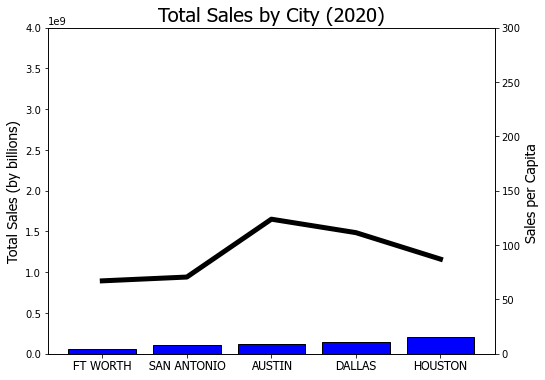

In [42]:
plt.figure(figsize=(8,6))
cities = []
for city in citysales2020_sort['location_city']:
    cities.append(citysales2020_sort['location_city'])
total_sales = citysales2020_sort['total_receipts']
x_axis = np.arange(len(cities))
plt.ylim(0,4000000000)
plt.bar(x_axis, total_sales, color="blue", edgecolor="black", align="center")
hfont = {'fontname':'Tahoma'}
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['FT WORTH','SAN ANTONIO','AUSTIN','DALLAS','HOUSTON'], **hfont,fontsize=12)
plt.ylabel("Total Sales (by billions)", **hfont,fontsize=14)
axis2 = plt.twinx()
axis2.plot(x_axis, citysales2020_sort['sales_per_capita'], color='black',linewidth=5)
axis2.set_ylim(0, 300)
axis2.set_ylabel('Sales per Capita ', **hfont,fontsize=14)
plt.title("Total Sales by City (2020)", **hfont,fontsize=20)
plt.savefig("../SMU_Project1_Group1/total_sales_by_city_2020_v2.png")
plt.show()

In [ ]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [14]:
storesales2019 = dfcities2019.groupby(['location_name','location_address'])['total_receipts'].sum().reset_index()
storesales2019.head(20)

,location_name,location_address,total_receipts
0,'PEPPER TWINS',315 FAIRVIEW AVE,517
1,'SAMMY'S' ON THE LAKE,6680 PEDEN RD,44981
2,"(CHRP, LLC) DRAKE'S DALLAS",5007 W LOVERS LN,276879
3,042 LOUNGE,13711 WESTHEIMER RD STE B1,15289
4,100% TAQUITO CO,3245 SOUTHWEST FWY,114696
5,12 CUTS STEAK HOUSE,18010 DALLAS PKWY,20660
6,"1424A WESTHEIMER BAR GROUP, L.L.C.",1424A WESTHEIMER RD,134086
7,1820,1820 FRANKLIN ST,218306
8,18TH & VINE BARBEQUE,2511 THROCKMORTON ST,86044
9,2-A-DAYS,10555 PEARLAND PKWY STE G,209752


In [15]:
storesales2020 = dfcities2020.groupby(['location_name','location_address'])['total_receipts'].sum().reset_index()
storesales2020.head(20)

,location_name,location_address,total_receipts
0,'PEPPER TWINS',315 FAIRVIEW AVE,13
1,'SAMMY'S' ON THE LAKE,6680 PEDEN RD,27784
2,"(CHRP, LLC) DRAKE'S DALLAS",5007 W LOVERS LN,616621
3,042 LOUNGE,13711 WESTHEIMER RD STE B1,2850
4,100% TAQUITO CO,3245 SOUTHWEST FWY,62533
5,12 CUTS STEAK HOUSE,18010 DALLAS PKWY,53412
6,1751 SEA AND BAR,191 HEIGHTS BLVD,88678
7,1820,1820 FRANKLIN ST,8353
8,18TH & VINE BARBEQUE,2511 THROCKMORTON ST,84041
9,1919,1420 S ALAMO ST STE 1,0


In [16]:
mask_not0 = storesales2019.total_receipts > 0
mask_0 = storesales2019.total_receipts == 0
storesales2019_clean = storesales2019.loc[mask_not0]
storesales2019_0 = storesales2019.loc[mask_0]
total_stores_19 = storesales2019.index.nunique()
stores_w_sales_19 = storesales2019_clean.index.nunique()
stores_wo_sales_19 = storesales2019_0.index.nunique()
per_no_sales_19 = stores_wo_sales_19/total_stores_19
per_no_sales_19

0.07892204042348412

In [17]:
storesales2020_clean.sort_values('total_receipts',ascending=True).head(20).reset_index()

NameError: name 'storesales2020_clean' is not defined

In [ ]:
mask2_not0 = storesales2020.total_receipts > 0
mask2_0 = storesales2020.total_receipts == 0
storesales2020_clean = storesales2020.loc[mask2_not0]
storesales2020_0 = storesales2020.loc[mask2_0]
total_stores_20 = storesales2020.index.nunique()
stores_w_sales_20 = storesales2020_clean.index.nunique()
stores_wo_sales_20 = storesales2020_0.index.nunique()
per_no_sales_20 = stores_wo_sales_20/total_stores_19
per_no_sales_20

In [ ]:
#includes stores with zero sales
stores_ = pd.merge(storesales2019,storesales2020,on=['location_name','location_address'],how='inner')
stores_all = stores_.rename(columns={'total_receipts_x': '2019 Sales','total_receipts_y': '2020 Sales'})
stores_all['2019 Rank'] = stores_all['2019 Sales'].rank(ascending=False)
stores_all['2020 Rank'] = stores_all['2020 Sales'].rank(ascending=False)
stores_all['\u0394 Sales'] = stores_all['2020 Sales']-stores_all['2019 Sales']
stores_all['\u0394 Sales%'] = stores_all['2020 Sales']/stores_all['2019 Sales']-1
stores_all['\u0394 Rank'] = stores_all['2020 Rank']-stores_all['2019 Rank']
stores_all.sort_values('\u0394 Sales%',ascending=True).head(20).reset_index()
stores_all_new = pd.merge(stores_all,dfcities[['location_name','location_address','location_city']].drop_duplicates(),on=['location_name','location_address'],how='inner')
stores_all_new


In [ ]:
#excludes stores that had zero sales
stores_2 = pd.merge(storesales2019_clean,storesales2020_clean,on=['location_name','location_address'],how='inner')
stores_all2 = stores_2.rename(columns={'total_receipts_x': '2019 Sales','total_receipts_y': '2020 Sales'})
stores_all2['2019 Rank'] = stores_all2['2019 Sales'].rank(ascending=False)
stores_all2['2020 Rank'] = stores_all2['2020 Sales'].rank(ascending=False)
stores_all2['\u0394 Sales'] = stores_all2['2020 Sales']-stores_all2['2019 Sales']
stores_all2['\u0394 Sales%'] = stores_all2['2020 Sales']/stores_all2['2019 Sales']-1
stores_all2['\u0394 Rank'] = stores_all2['2020 Rank']-stores_all2['2019 Rank']
stores_all2.sort_values('2019 Rank',ascending=True).head(20).reset_index()
stores_all_new2 = pd.merge(stores_all2,dfcities[['location_name','location_address','location_city']].drop_duplicates(),on=['location_name','location_address'],how='inner')
stores_all_new2

In [ ]:
#how many stores had sales in 2019 but 0 in 2020
mask3 = (stores_all['2019 Sales']>100000) & (stores_all['2020 Sales']==0)
stores_all.loc[mask3]

In [ ]:
dfcities_citytrend=dfcities.groupby([dfcities.location_city,dfcities.obligation_end_date_yyyymmdd])['total_receipts'].sum().reset_index()
dfcities_austin=dfcities_citytrend.loc[dfcities_citytrend.location_city=='AUSTIN']
dfcities_dallas=dfcities_citytrend.loc[dfcities_citytrend.location_city=='DALLAS']
dfcities_houston=dfcities_citytrend.loc[dfcities_citytrend.location_city=='HOUSTON']
dfcities_sanantonio=dfcities_citytrend.loc[dfcities_citytrend.location_city=='SAN ANTONIO']
dfcities_ftworth=dfcities_citytrend.loc[dfcities_citytrend.location_city=='FORT WORTH']
monthsdf = dfcities.loc[:,["obligation_end_date_yyyymmdd","month","year"]].drop_duplicates().reset_index(drop=True)
monthsdf['year_month'] = monthsdf['year'].astype(str) + "_" + monthsdf['month'].astype(str)
months = ["Jan'19","Feb'19","Mar'19","Apr'19","May'19","Jun'19","Jul'19","Aug'19","Sep'19","Oct'19","Nov'19","Dec'19",
         "Jan'20","Feb'20","Mar'20","Apr'20","May'20","Jun'20","Jul'20","Aug'20","Sep'20","Oct'20","Nov'20","Dec'20"]


In [ ]:
plt.figure(figsize=(12,10))
x_axis_data = np.arange(1,25,1)
x_axis_data

austin = dfcities_austin['total_receipts']
dallas = dfcities_dallas['total_receipts']
houston = dfcities_houston['total_receipts']
sanantonio = dfcities_sanantonio['total_receipts']
ftworth = dfcities_ftworth['total_receipts']
plt.plot(x_axis_data, austin,color='orange',label="Austin",linewidth=3)
plt.plot(x_axis_data, dallas,color='blue',label="Dallas",linewidth=3)
plt.plot(x_axis_data, houston,color='red',label="Houston",linewidth=3)
plt.plot(x_axis_data, sanantonio,color='purple',label="San Antonio",linewidth=3)
plt.plot(x_axis_data, ftworth,color='green',label="Fort Worth",linewidth=3)
plt.legend(loc="upper right",fontsize=14)
tick_locations = [value+0.4 for value in x_axis_data]
# plt.xticks(tick_locations,months, **hfont,fontsize=12,rotation=45)
plt.xticks(tick_locations, months, rotation=45,fontsize=12)
plt.ylabel("Total Sales (by billions)", **hfont,fontsize=16)
plt.title("Total Sales by City by Month", **hfont,fontsize=20)
plt.grid()
plt.savefig("../SMU_Project1_Group1/citysales_by_month.png")
plt.show()



In [18]:
citysales2020_sort

,location_city,total_receipts,population,sales_per_capita,Sales Ranking,Sales per Capita Ranking,per_cap_yoy_diff,diff%
2,FORT WORTH,58677658,874401,67.106120,5.0,5.0,-38.072621,-0.361980
4,SAN ANTONIO,109230731,1547253,70.596555,4.0,4.0,-58.707549,-0.454027
0,AUSTIN,121203285,978908,123.814786,3.0,1.0,-171.504119,-0.580742
1,DALLAS,149715099,1343573,111.430565,2.0,2.0,-109.302952,-0.495181
3,HOUSTON,202047292,2320268,87.079291,1.0,3.0,-78.768659,-0.474945


In [45]:
citysales2020_formated=citysales2020_sort.rename(columns = {'location_city': 'City'})
citysales2020_formated.drop(columns=[total_receipts,population,sales_per_capita])

TypeError: 'DataFrame' object is not callable